In [2]:
# data setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/Advertising.csv'
sales = pd.read_csv(path)
sales.head(3)


# toy sales predictions

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [3]:
X = sales[['TV', 'Radio', 'Newspaper']]
y = sales['Sales']

In [4]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,y)
y_pred = linreg.predict(X)

In [5]:
# model evaluatoin
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
# MSE, on average predictions off by about 1600 dollars
np.sqrt(mean_squared_error(y,y_pred))

1.6685701407225697

In [7]:
# MAE
mean_absolute_error(y,y_pred)

1.2520112296870682

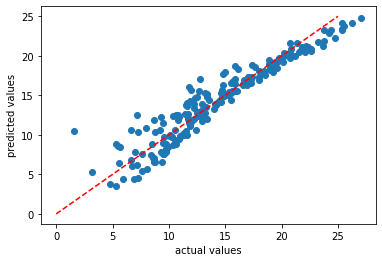

In [8]:
# plot predictions and actual values
plt.scatter(y,y_pred)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.plot([0,25], [0,25], '--', color='red')

# predicting bycycle traffic across Seattle's Fremont bridge

## Goal: Predict traffic based on:
- temperature
- wind
- precipitation
- snow
- day of week
- holidays
- (maybe) game days
- air quality


In [9]:
fremont = 'Fremont_Bridge_Bicycle_Counter.csv'

fremont = pd.read_csv(fremont, index_col='Date', parse_dates=True)
fremont.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [10]:
# get daily traffic
fremont = fremont.resample('d').sum()
fremont.head(3)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0


In [11]:
# day of the week
fremont['day_of_week'] = fremont.index.dayofweek
fremont['month'] = fremont.index.month
fremont['year'] = fremont.index.year
fremont['covid'] = 0
fremont.loc['03-01-2020':, 'covid'] = 1
fremont.head(1)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid
Date,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0


<AxesSubplot:xlabel='Date'>

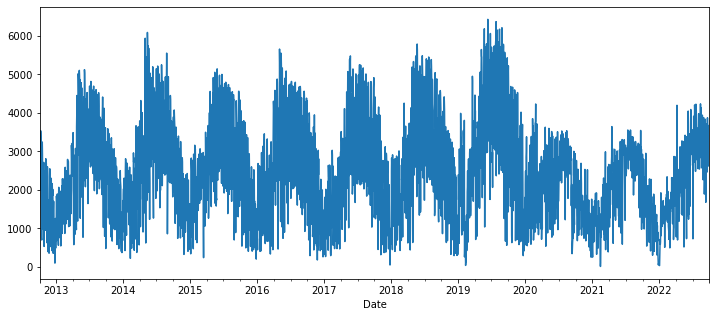

In [12]:
fremont['Fremont Bridge Total'].plot(figsize=(12,5))

In [24]:
# holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays('01-01-2013', '09-30-2022') 
fremont['holidays'] = pd.Series(1,index=holidays, name='holidays')
fremont.fillna(0, inplace=True)

In [25]:
# hours of daylight
def get_hoursdaylight(date):
    axis = np.radians(23.4) # tilt of earth's axis
    latitude = np.radians(47.61) # Seattle's latitude
    days = (date-pd.to_datetime('2000-12-31')).days
    m = (1- np.tan(latitude)*np.tan(axis*np.cos(days*2*np.pi/365.25)))
    return 24*np.degrees(np.arccos(1-m)/180)
fremont['hours_daylight'] = fremont.index.map(get_hoursdaylight)
fremont.hours_daylight.head(3)

Date
2013-01-01    8.227459
2013-01-02    8.229505
2013-01-03    8.232911
Freq: D, Name: hours_daylight, dtype: float64

<AxesSubplot:xlabel='Date'>

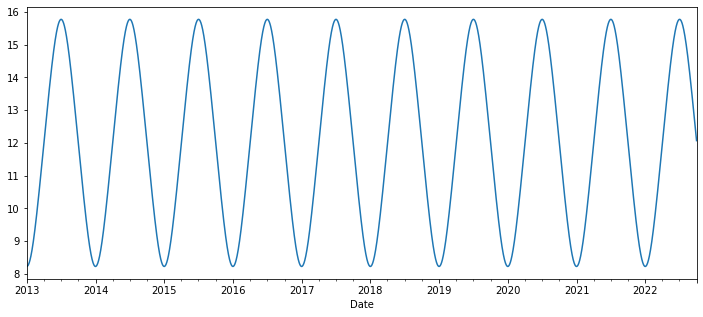

In [26]:
fremont.hours_daylight.plot(figsize=(12,5))

In [27]:
# weather features
weather = pd.read_csv('seattle_weather.csv',index_col = 'DATE', parse_dates=True)
weather.head()

# cols to use: PRCP (precipitation), TAVG(averge temperature), SNOW(snowfall), AWND (avg wind speed)
weather[['PRCP', 'TAVG', 'SNOW', 'AWND']].isna().sum()

PRCP     3
TAVG    90
SNOW     0
AWND     1
dtype: int64

<AxesSubplot:xlabel='DATE'>

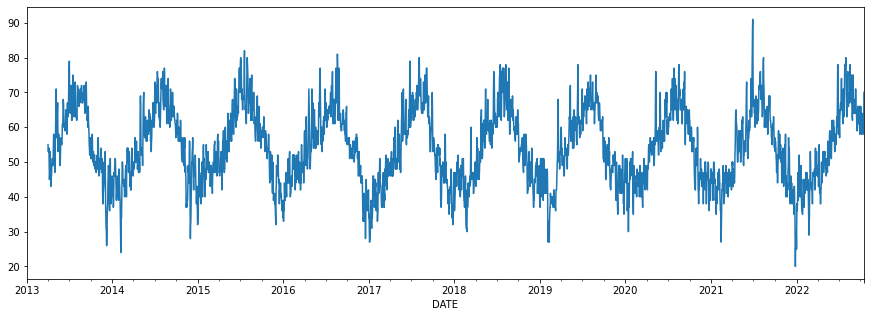

In [28]:
weather.TAVG.plot(figsize=(15,5))

<AxesSubplot:xlabel='DATE'>

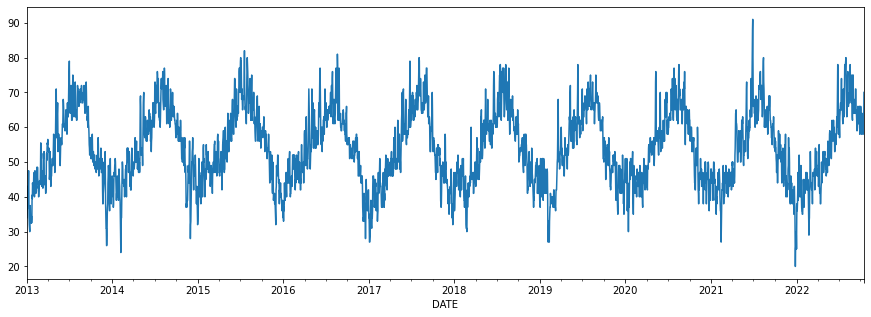

In [29]:
# need to fill 90 missing values from TAVG
weather.TAVG.fillna(0.5*(weather.TMAX+weather.TMIN), inplace=True)
weather.TAVG.plot(figsize=(15,5))

In [30]:
fremont = fremont.join(weather[['PRCP', 'TAVG', 'SNOW', 'AWND']]).loc['2013-01-01':] # add weather data and drop 2012 data
fremont.head(3)

ValueError: columns overlap but no suffix specified: Index(['PRCP', 'TAVG', 'SNOW', 'AWND'], dtype='object')

In [ ]:
# air quality index
aqi = pd.read_csv('Seattle_air_quality_index.csv', index_col='Date', parse_dates=True)
#aqi
#fremont['aqi'] = aqi.DAILY_AQI_VALUE


In [ ]:
fremont.head()

In [32]:
fremont.fillna(method='ffill', inplace=True)
fremont.aqi.plot(figsize=(12,5))

AttributeError: 'DataFrame' object has no attribute 'aqi'

In [33]:
#2013-2020
fremont2013_2020 = fremont[fremont.year < 2021]
# 2021-2022
fremont2021_2022 = fremont[fremont.year>=2021]

In [80]:
# goal is to predict fremont Bridge Total
y = fremont2013_2020['Fremont Bridge Total']
X = fremont2013_2020[['day_of_week', 'covid', 'holidays', 'hours_daylight', 'PRCP', 'TAVG', 'SNOW', 'AWND', 'year']] # add aqi later

In [89]:
X

,day_of_week,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND,year
Date,,,,,,,,,
2013-01-01,1,0,1.0,8.227459,0.00,34.0,0.0,6.04,2013
2013-01-02,2,0,0.0,8.229505,0.00,36.5,0.0,7.16,2013
2013-01-03,3,0,0.0,8.232911,0.16,36.5,0.0,6.71,2013
2013-01-04,4,0,0.0,8.237676,0.10,43.0,0.0,6.26,2013
2013-01-05,5,0,0.0,8.243794,0.12,42.0,0.0,6.93,2013
...,...,...,...,...,...,...,...,...,...
2020-12-27,6,1,0.0,8.237676,0.13,44.0,0.0,6.71,2020
2020-12-28,0,1,0.0,8.232911,0.00,41.0,0.0,7.83,2020
2020-12-29,1,1,0.0,8.229505,0.16,39.0,0.0,4.70,2020


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures


In [36]:
num_features = ['hours_daylight', 'PRCP', 'TAVG', 'SNOW', 'AWND', 'year', 'aqi']
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

cat_features = ['day_of_week', 'covid', 'holidays']
cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, num_features),
    ('cat_processor', cat_processor, cat_features)
])

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

In [83]:
# simpler pipe setup from above
num_features = ['hours_daylight', 'PRCP', 'TAVG', 'SNOW', 'AWND', 'year'] ## add aqi later
cat_features = ['day_of_week', 'covid', 'holidays']

feature_processor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'), cat_features)
], remainder='passthrough') # do nothing to remaining features

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)), # bias includes column of 1s. Not neede for linear regression
    ('regressor', LinearRegression()),
])

In [38]:
pipe

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['day_of_week', 'covid',
                                                   'holidays'])])),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('regressor', LinearRegression())])

In [39]:
pipe.fit(X,y)
fremont2013_2020['predicted'] = pipe.predict(X)

C:\Users\Derrick\AppData\Local\Temp\ipykernel_13964\465248481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fremont2013_2020['predicted'] = pipe.predict(X)


<AxesSubplot:xlabel='Date'>

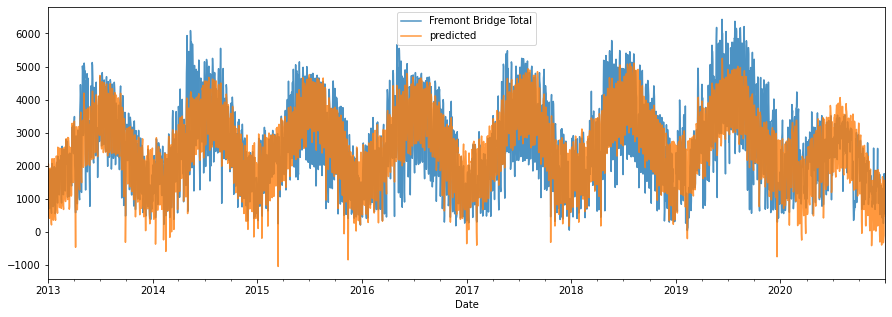

In [40]:
# daily traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total', 'predicted']].plot(figsize=(15,5), alpha=0.8)

<AxesSubplot:xlabel='Date'>

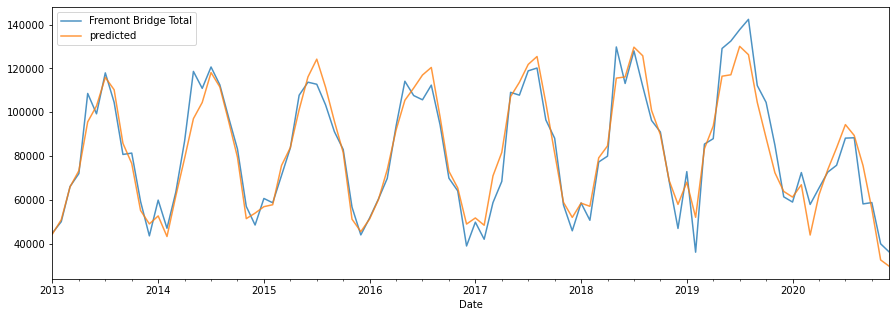

In [41]:
# make plot simpler by plotting monthly traffic
fremont2013_2020[['Fremont Bridge Total', 'predicted']].resample('m').sum().plot(figsize=(15,5), alpha=0.8)

## Coefficients without polynomial features

In [42]:
# access onehot encoder. Access through ColumnTransformer('processor') then OneHotEncoder('encoder')
feature_names = list(pipe['processor'].named_transformers_['encoder'].get_feature_names_out(cat_features)) + num_features

In [43]:
coefficients = pipe['regressor'].coef_

In [44]:
pd.DataFrame(coefficients, index=feature_names, columns=['coefficient'])

,coefficient
day_of_week_0,511.355917
day_of_week_1,603.198991
day_of_week_2,575.727346
day_of_week_3,438.893474
day_of_week_4,154.069065
day_of_week_5,-1110.438589
day_of_week_6,-1172.806204
covid_0,612.422112
covid_1,-612.422112
holidays_0.0,587.534925


## Coefficients with polynomial features


In [45]:
poly_feature_names = pipe['poly_features'].get_feature_names_out(feature_names)

In [46]:
coefficients = pipe['regressor'].coef_

In [47]:
pd.DataFrame(coefficients, index=poly_feature_names, columns=['coefficient'])

,coefficient
day_of_week_0,511.355917
day_of_week_1,603.198991
day_of_week_2,575.727346
day_of_week_3,438.893474
day_of_week_4,154.069065
day_of_week_5,-1110.438589
day_of_week_6,-1172.806204
covid_0,612.422112
covid_1,-612.422112
holidays_0.0,587.534925


## Data science fiction: 2021 and 2022 without COVID

In [48]:
fremont2021_2022.covid = 0

C:\Users\Derrick\AppData\Local\Temp\ipykernel_13964\3279910070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fremont2021_2022.covid = 0


In [49]:
X2021_2022 = fremont2021_2022[['day_of_week', 'covid', 'holidays', 
                             'hours_daylight', 'year', 'PRCP', 'TAVG', 'SNOW', 'AWND']]
y2021_2022 = fremont2021_2022['Fremont Bridge Total']

In [50]:
fremont2021_2022['prediction'] = pipe.predict(X2021_2022)

C:\Users\Derrick\AppData\Local\Temp\ipykernel_13964\1105830050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fremont2021_2022['prediction'] = pipe.predict(X2021_2022)


<AxesSubplot:xlabel='Date'>

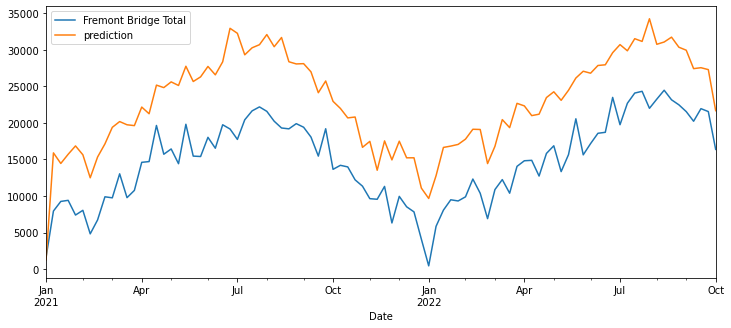

In [51]:
fremont2021_2022[['Fremont Bridge Total', 'prediction']].resample('w').sum().plot(figsize=(12,5))

# Gridsearch


## Linear Regression, Ridge, and Lasso
- Linear Regression - MSE coefficients
- Ridge - penalize squared thetas
- Lasso - Make error small, keep coefficients small

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('poly_features', PolynomialFeatures(degree=1)),
    ('regressor', Ridge(alpha=1)) # use Ridge() or Lasso(). alpha defaults to 1
])

In [53]:
alpha_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]

param_dic = {'poly_features__degree': [1,2,3], 
             'regressor__alpha': alpha_list}

In [60]:
grid = GridSearchCV(pipe,param_dic, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, verbose=1)

In [61]:
grid.fit(X, y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['day_of_week',
                                                                          'covid',
                                                                          'holidays'])])),
                                       ('poly_features', PolynomialFeatures()),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'poly_features__degree': [1, 2, 3],
                         'regressor__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000]},
             scoring='neg_mean_squared_error', verbose=1)

In [63]:
grid.best_params_

{'poly_features__degree': 2, 'regressor__alpha': 10}

In [64]:
best_pipe = grid.best_estimator_

In [65]:
fremont2021_2022['prediction'] = best_pipe.predict(X)


ValueError: Length of values (2922) does not match length of index (638)

## Random Forest vs regression

In [71]:
fremont2013_2020['prediction'] = best_pipe.predict(X)

C:\Users\Derrick\AppData\Local\Temp\ipykernel_13964\995649804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fremont2013_2020['prediction'] = best_pipe.predict(X)


<Figure size 720x720 with 0 Axes>

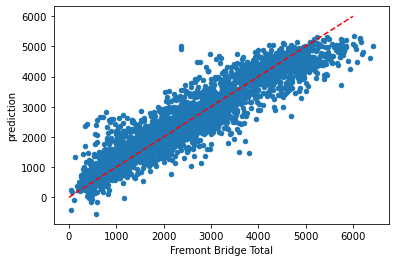

In [73]:
plt.figure(figsize=(10,10))
fremont2013_2020.plot.scatter(x='Fremont Bridge Total', y='prediction')
plt.plot([0,6000], [0,6000], 'r--')


In [85]:
# random forest pipeline
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    #('poly_features', PolynomialFeatures(degree=2)), # random forests dont need polynomial features
    ('regression', RandomForestRegressor())
])

In [86]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_dic = {'regressor__n_estimators' : [10,50,100,200],
            'regressor__max_depth':[2,4,8], 
             'regressor__max_leaf_nodes':[2,4,8,16, None], 
             'regressor__min_samples_split':[2,4,8,16],
             'regressor__min_samples_leaf':[1,2,4,8,16],
            }
grid = GridSearchCV(pipe, param_dic, cv=5, n_jobs=-1, verbose=True, scoring='neg_mean_squared_error')
# for scoring: using accuracy because this is a classification problem
# for scoring: use neg mean squared errror for regression
grid.fit(X, y)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('feature_processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_of_week', 'covid',
                                                   'holidays'])])),
                ('regression', RandomForestRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].